# Monthly rainfall index of Kerela from 1900 - 2018

In [1]:
# Import standard packages
import numpy as np
import pandas as pd

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display matplotlib plots inline
%matplotlib inline

# Install scikit-learn library if not already installed
# This comment is not necessary, as the `%pip install scikit-learn` line will only be executed if the library is not already installed.

# For classification models
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier


# For model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# General info on the dataset

In [2]:
# Prepare the 'kerala.csv' dataset into a dataframe using pandas
floodData = pd.read_csv('kerala.csv')

# Display the first few rows of the dataset
floodData.head()

# Kerala is a state in India located in the southwestern part of the country.

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
floodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SUBDIVISION      118 non-null    object 
 1   YEAR             118 non-null    int64  
 2   JAN              118 non-null    float64
 3   FEB              118 non-null    float64
 4   MAR              118 non-null    float64
 5   APR              118 non-null    float64
 6   MAY              118 non-null    float64
 7   JUN              118 non-null    float64
 8   JUL              118 non-null    float64
 9   AUG              118 non-null    float64
 10  SEP              118 non-null    float64
 11  OCT              118 non-null    float64
 12  NOV              118 non-null    float64
 13  DEC              118 non-null    float64
 14  ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS           118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory usage: 14.9+ KB


The .info() method confirms that there are **no null values** in the dataset. It also shows that there are **118 entries** or rows and **16 columns**. The DataFrame has a **memory size** of 14.9+ KB.

The **dtypes** column shows the data types of the columns in the DataFrame. In this case, there is 1 column of dtype int64, 2 columns of dtype object, and 13 columns of dtype float64

In [4]:
floodData.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


The .describe() method is used to provide a summary of the numerical data in the data frame named floodData.

* Count is the number of data that are in numerical form.
* Mean is the average of each column.
* Std is the standard deviation, which measures the spread of the average data. The larger the standard deviation, the greater the variability of the data.
* Min is the minimum value in the column.
* 25% is the first quartile, obtained by dividing the data into the lowest 25%.
* 50% is the second quartile or median, the middle value of the data.
* 75% is the third quartile, obtained by dividing the data into the highest 25%.
* Max is the maximum value in the column.

In [5]:
floodData['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

Perform label encoding to change the value yes to 1 and the value no to 0, so that it is easier to use for data analysis or modeling.

I will now clean the dataset, as it appears to have some quality problems.

In [6]:
floodData.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [7]:
# Remove all unnecessary spaces from the column names
floodData.columns = floodData.columns.str.strip()
print(floodData.columns)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')


# **1. How many floods and non-floods have occurred?**

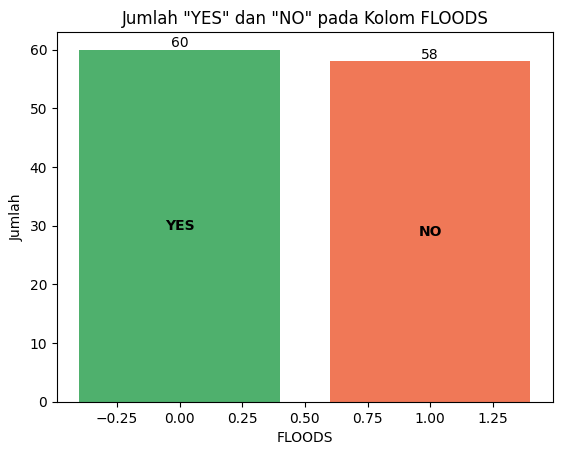

In [8]:
# Menghitung jumlah "YES" dan "NO"
flood_counts = floodData['FLOODS'].value_counts()

# Membuat plot bar
plt.bar([0, 1], flood_counts.values, color=['#4FB06D', '#F07857'])
colors = ['red', 'green']

# Menambahkan label pada setiap batang
for i, count in enumerate(flood_counts.values):
    plt.text(i, count+0.5, str(count),  ha='center')
    plt.text(i, count/2, ['YES', 'NO'][i], ha='center', va='center', weight='bold')

# Menambahkan label pada sumbu x dan y
plt.xlabel('FLOODS')
plt.ylabel('Jumlah')

# Menambahkan judul
plt.title('Jumlah "YES" dan "NO" pada Kolom FLOODS')

# Menampilkan plot
plt.show()

The plot of the number of floods and non-floods each year reveals that the data is complete and **relatively balanced**, with 60 flood data and 58 non-flood data.

# **2. Is there a correlation?**

In [9]:
# Deleting the SUBDIVISION column to search for the corr heatmap
floodData2 = floodData.drop('SUBDIVISION', axis = 1)

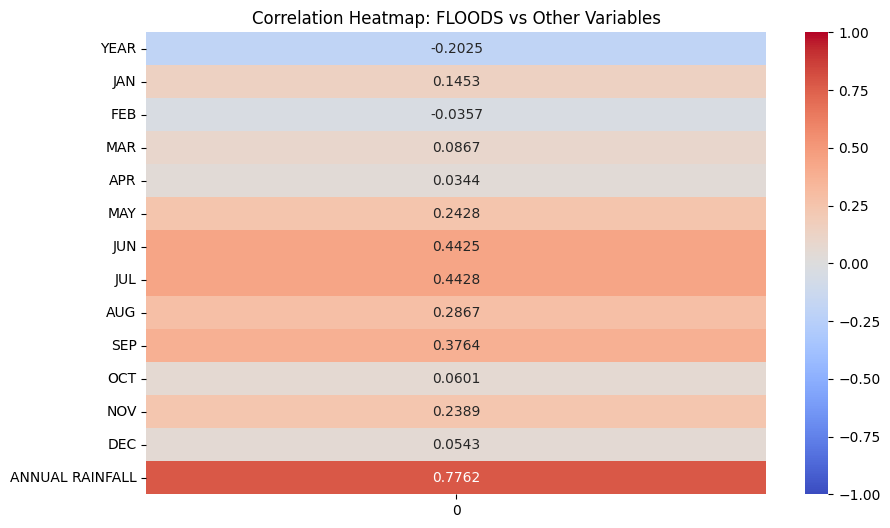

In [10]:
# Calculating the correlation between the 'FLOODS' row and other variables
correlation_row = floodData2.drop('FLOODS', axis=1).astype(float).corrwith(floodData2['FLOODS'].astype(float))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_row.to_frame(), annot=True, cmap="coolwarm", fmt=".4f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Heatmap: FLOODS vs Other Variables")
plt.show()

The heatmap visualization shows the correlation between the "FLOODS" variable and the other variables, namely monthly rainfall. The plot displays numbers ranging from -1 to 1. If the number is close to 1, it has a strong positive correlation with floods. Conversely, if it is close to -1, it has a strong negative correlation. If it is close to 0, it is weakly correlated.

June and July have a strong correlation compared to the others as a cause of floods.

In [11]:
# Ensuring that there is no null data
floodData.isnull().sum()

SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64

In [12]:
# Ensuring that there is no Not a Number (NaN) data
floodData.isna().any()

SUBDIVISION        False
YEAR               False
JAN                False
FEB                False
MAR                False
APR                False
MAY                False
JUN                False
JUL                False
AUG                False
SEP                False
OCT                False
NOV                False
DEC                False
ANNUAL RAINFALL    False
FLOODS             False
dtype: bool

# **3. What is the distribution of the monthly rainfall in Kerala?**

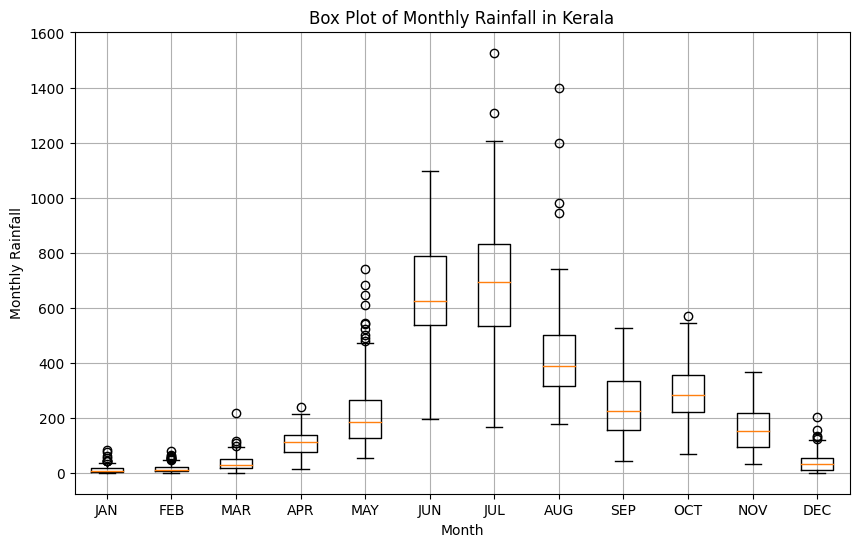

In [13]:
# Select the columns of the months you want to plot
data = floodData[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data.values, labels=data.columns)
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.title('Box Plot of Monthly Rainfall in Kerala')
plt.grid()
plt.show()

Based on the box plot above, the distribution of monthly rainfall tends to have a longer tail towards higher values. Most months also have low rainfall because the median value is lower than the mean value. There are a few months with high rainfall, which are marked by outliers that are far above the other values.

C:\Users\Jason\AppData\Local\Temp\ipykernel_23360\387950080.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('Reds', len(median_rainfall))


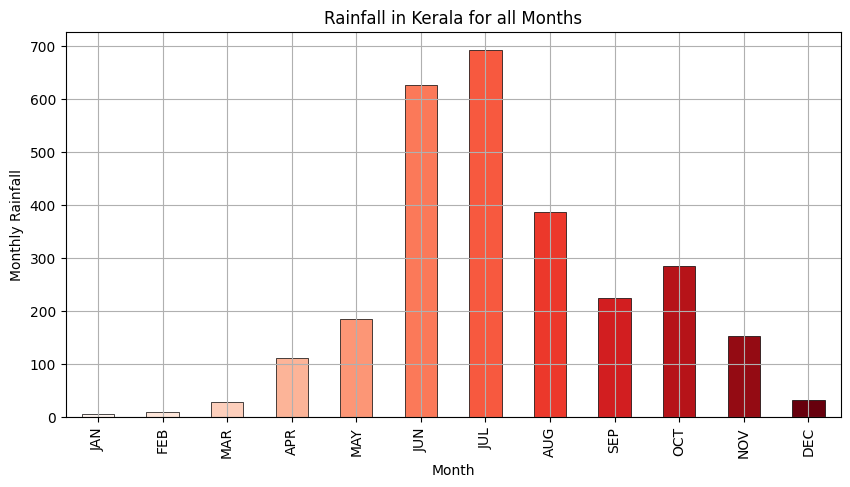

In [14]:
# Calculate the median monthly rainfall
median_rainfall = floodData[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].median()
# Use the median to avoid the influence of extreme weather on the mean

# Define the gradient color
color = plt.cm.get_cmap('Reds', len(median_rainfall))
ax = median_rainfall.plot.bar(edgecolor='k', linewidth=0.5, figsize=(10, 5), color=color(np.arange(len(median_rainfall))))
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.title('Rainfall in Kerala for all Months')
plt.grid()
plt.show()

By visualizing the bar plot of the median monthly rainfall in Kerala, we get a picture of the variation in monthly rainfall in Kerala throughout the year. June and July appear to have higher medians than usual, while January and February have low median rainfall, indicating the rainy and dry seasons in Kerala.

The visualization also shows that June and July have the highest medians, which can be helpful for those who need activities with high rainfall.

# **4. Is there a trend towards rainfall that occurs each year?**

The red line on the graph is a least-squares regression. This is used as a first step to see the trend of rainfall.

The rainfall against 'ANNUAL RAINFALL' shows a decreasing slope, but not too steep. This provides information that the rainfall has been experiencing a steady decline every year.

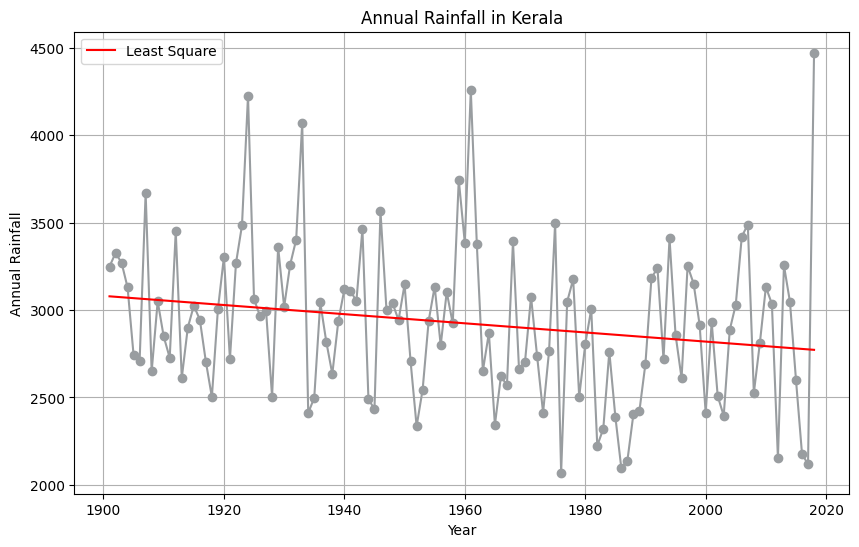

In [15]:
# Get the annual rainfall data
annual_rainfall = floodData['ANNUAL RAINFALL']

# Get the year data
years = floodData['YEAR']

# Plot the annual rainfall vs year
plt.figure(figsize=(10, 6))
plt.plot(years, annual_rainfall, marker='o', color ='#999DA0')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.title('Annual Rainfall in Kerala')
plt.grid(True)

# Add the least squares line
slope, intercept = np.polyfit(years, annual_rainfall, 1)
plt.plot(years, slope*years + intercept, color='r', linestyle='-', label='Least Square')

plt.legend()
plt.show()

The following is a visualization of monthly rainfall over several years using the least squares line. 

If the slope of the least squares line has a positive value, such as in April, September, and August, it indicates that the trend of rainfall in that month is increasing over time. 

Conversely, if the value is negative, such as in May, June, July, November, and December, it indicates that the trend of rainfall in that month is decreasing over time.

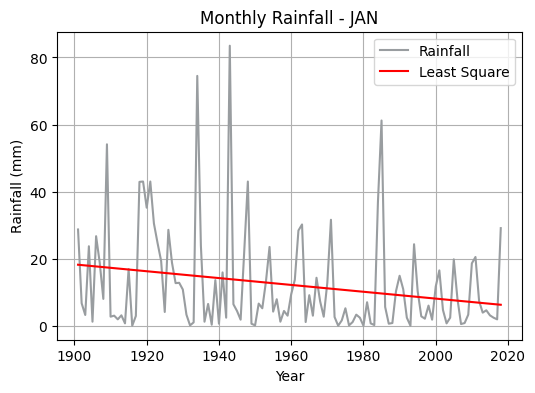

Slope of the least squares line for month jan : -0.102


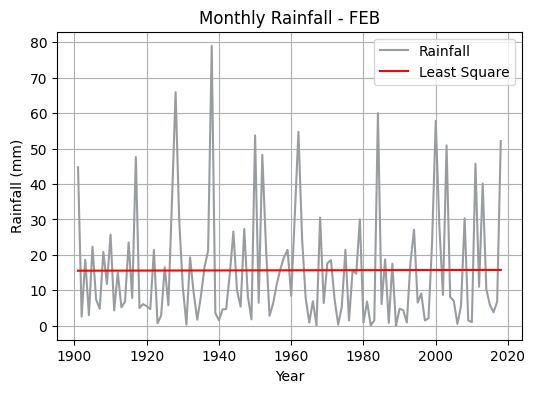

Slope of the least squares line for month feb : 0.002


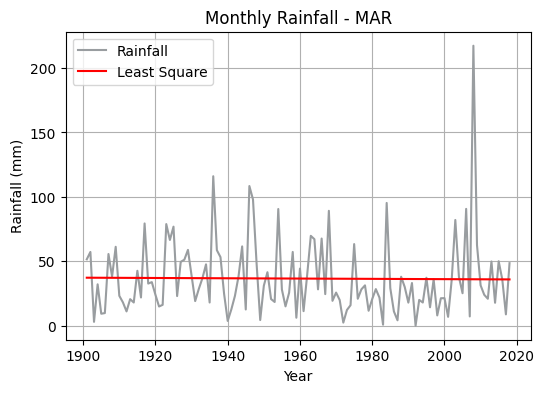

Slope of the least squares line for month mar : -0.011


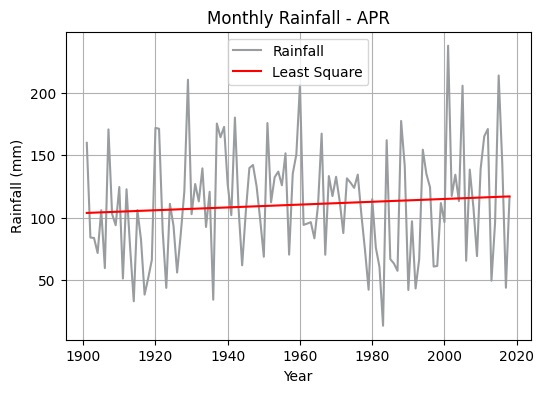

Slope of the least squares line for month apr : 0.113


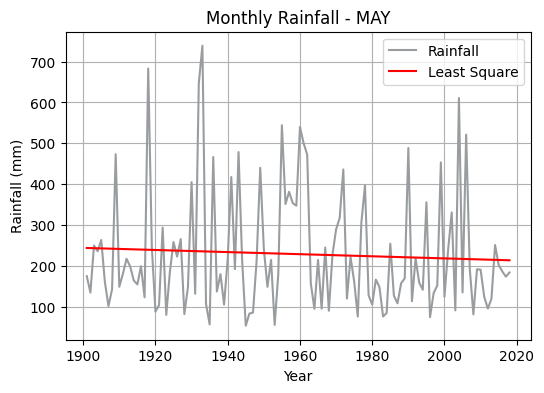

Slope of the least squares line for month may : -0.257


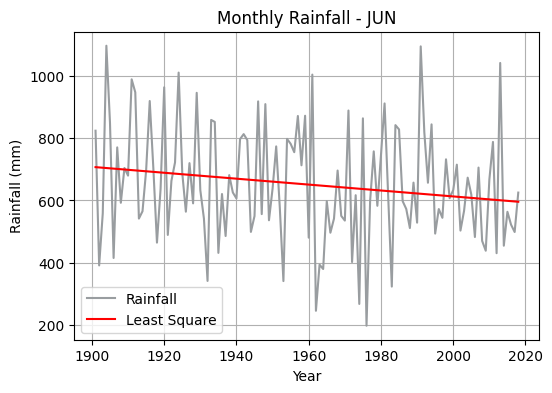

Slope of the least squares line for month jun : -0.952


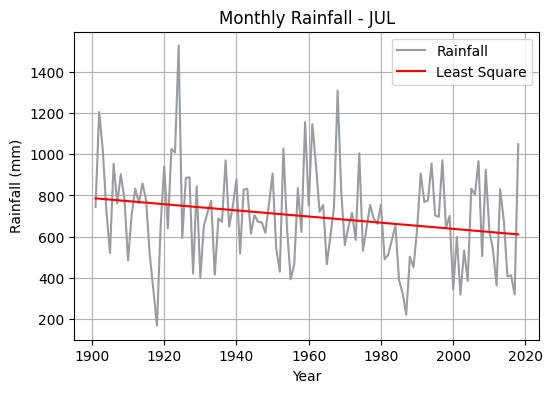

Slope of the least squares line for month jul : -1.495


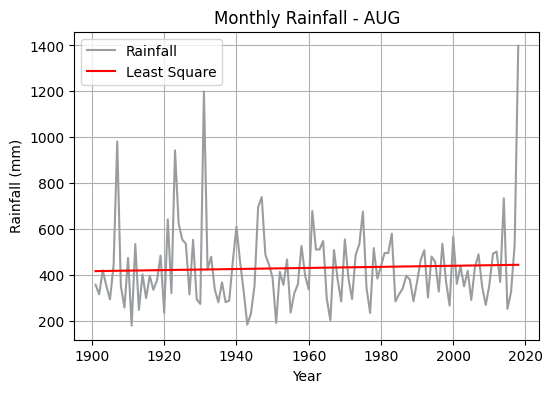

Slope of the least squares line for month aug : 0.235


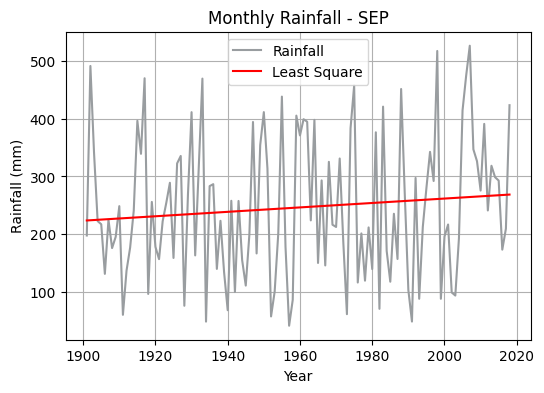

Slope of the least squares line for month sep : 0.384


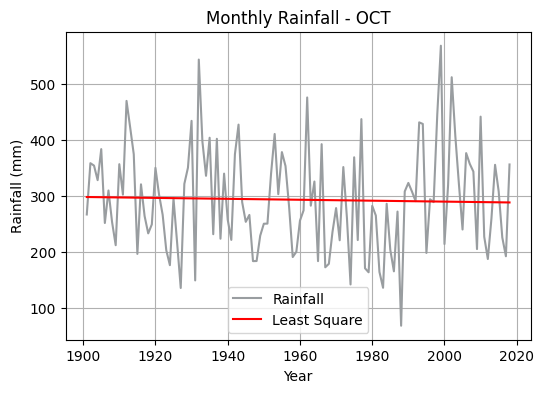

Slope of the least squares line for month oct : -0.083


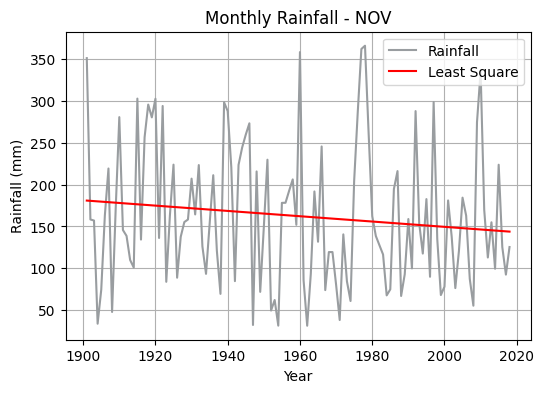

Slope of the least squares line for month nov : -0.317


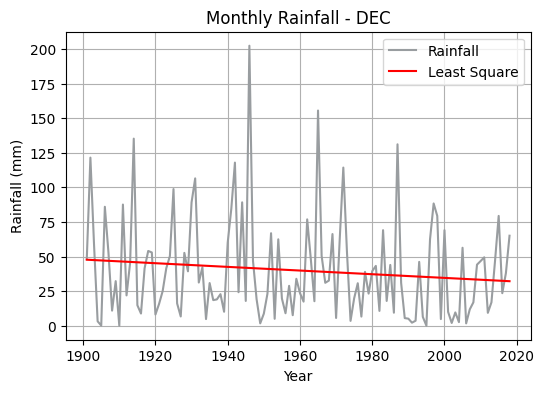

Slope of the least squares line for month dec : -0.133


In [16]:
# Get the months column
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Plot the monthly rainfall of floodData
for b in months:
    plt.figure(figsize=(6, 4))
    plt.plot(floodData['YEAR'], floodData[b], color ='#999DA0' , label='Rainfall')

    # Fit the least squares line
    x_plot = floodData['YEAR']
    y_plot = floodData[b]
    coeffs = np.polyfit(x_plot, y_plot, 1)
    y_fit = np.polyval(coeffs, x_plot)

    plt.plot(x_plot, y_fit, color='red', label='Least Square')

    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.title('Monthly Rainfall - ' + b)
    plt.grid()
    plt.legend()
    plt.show()
    print("Slope of the least squares line for month", b.lower(), ":",round(coeffs[0], 3))


provide an overview of the rainfall trends in Kerala over several years, which can be used to gain insights into predicting future rainfall values.

# **Splitting the Data**

In [17]:
# Split the data that we will use for prediction
X = floodData.iloc[:, 1:14]
X.head()

# Split the flood label from the data
y = floodData.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

In [18]:
# Split the dataset into train set and test set (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
# Check the shape of x_train and x_test
print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)

# The data is well-separated with 94 and 24 samples, which total to 118 samples, which is the same as the original dataset.

X_train shape = (94, 13)
X_test shape = (24, 13)


# **Preprocessing Data**

Minmax scaler is used to make the values in a range of 0 to 1. This is done to avoid a wide distribution of data.

Minmax scaler will be used for the LR model because the LR model predicts the target variable based on a linear relationship with the independent variables. If there is no scaler or scaling, then variables with larger values can have a greater impact on the regression results than variables with a smaller range. This can lead to inaccuracy or bias in the model.

In [20]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

# **Modelling**

To predict whether there will be a flood in the next year, I used 6 machine learning models: **KNN, LR, SVC, DT, Random Forest, and Ensemble Learning**. 

To evaluate the model, we used several metrics: accuracy, recall, and ROC.

* **K-fold cross-validation** is a technique that involves dividing the data into k folds to evaluate the model.
* **Accuracy score** measures how well the model can classify the data correctly overall.
* **Recall score** measures how well the model can identify and detect the positive class accurately.
* **ROC score** (Area Under the Receiver Operating Characteristic Curve) is a metric that measures the model's ability to distinguish between the positive and negative classes.

## KNN Classifier

In [21]:
model = neighbors.KNeighborsClassifier()
knn_model = model.fit(X_train,y_train)

In [22]:
# Make predictions for x_test
y_predict = knn_model.predict(X_test)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]


In [23]:
# Check the actual values
print("actual values of floods:")
print(y_test.values)

actual values of floods:
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]


In [24]:
# Calculate the accuracy score using k-fold cross-validation.
# The `knn_clf` uses the KNN model that was created previously.
# The `cv=3` parameter specifies the number of folds, so in this case, there are 3 folds.
# The `scoring='accuracy'` parameter specifies the accuracy score as the evaluation metric.

knn_accuracy = cross_val_score(knn_model, X_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)

In [25]:
# Print the accuracy score after 3 folds.

print('The accuracy score after 3 folds is:', knn_accuracy)

The accuracy score after 3 folds is: [0.625 1.    1.   ]



Accuracy Score: 91.67%
Recall Score: 86.67%
ROC AUC Score: 93.33%


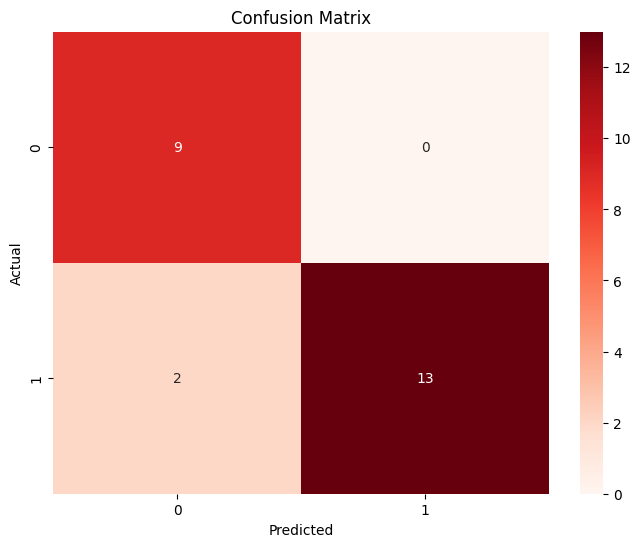

In [26]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the KNN model shows that there are:

* 13 true positives, meaning that the model correctly classified 13 data points as floods.
* 0 false positives, meaning that the model incorrectly classified 0 data points as floods.
* 2 false negative, meaning that the model incorrectly classified 2 data point as not a flood.
* 9 true negatives, meaning that the model correctly classified 9 data points as not floods.

Overall, the confusion matrix shows that the model is able to classify data with a high degree of accuracy.

## Logistic Regression

In [27]:
X_train_mini = minmax.fit_transform(X_train)
X_test_mini = minmax.transform(X_test)

In [28]:
lr = LogisticRegression()
lr_model = lr.fit(X_train_mini,y_train)

lr_accuracy = cross_val_score(lr_model,X_test_mini,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [29]:
lr_accuracy.mean()

0.5833333333333334

In [30]:
y_predict = lr_model.predict(X_test_mini)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1]


In [31]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]



Accuracy Score: 87.50%
Recall Score: 86.67%
ROC AUC Score: 87.78%


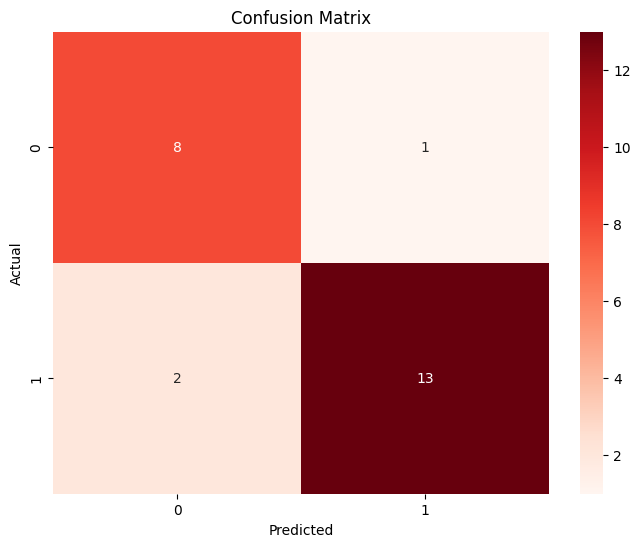

In [32]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the logistic regression model shows that there are:
* 13 true positives, meaning that the model correctly classified 13 data points as floods.
* 1 false positive, meaning that the model incorrectly classified 1 data point as floods.
* 2 false negatives, meaning that the model correctly classified 0 data points as not floods.
* 8 true negatives, meaning that the model correctly classified 2 data points as not floods.

## SVC

In [33]:
svc = SVC(kernel='rbf',probability=True)
svc_model = svc.fit(X_train,y_train)
svc_acc = cross_val_score(svc_model,X_test,y_test,cv=3,scoring="accuracy",n_jobs=-1)

In [34]:
svc_acc

array([0.625, 0.625, 0.625])

In [35]:
y_predict=svc_model.predict(X_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]


In [36]:
print("Predicted Flood Values:")
print(y_predict)

Predicted Flood Values:
[0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1]



Accuracy Score: 83.33%
Recall Score: 73.33%
ROC AUC Score: 86.67%


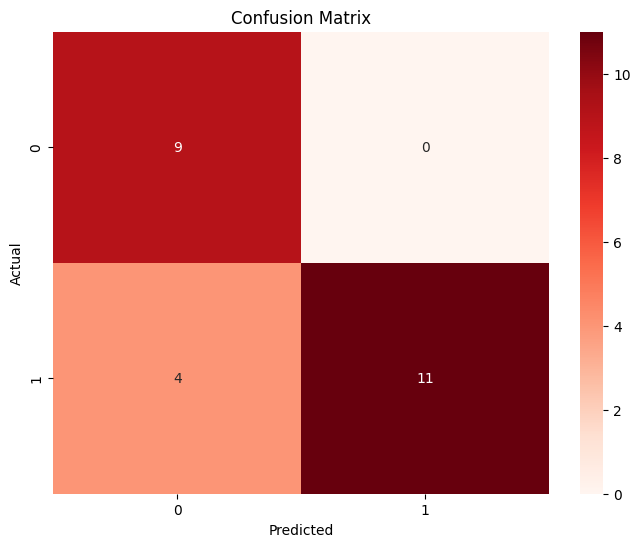

In [37]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the SVC model shows that there are:

* 11 true positives, meaning that the model correctly classified 11 data points as floods.
* 0 false positives, meaning that the model incorrectly classified 0 data points as floods.
* 4 false negative, meaning that the model incorrectly classified 4 data point as not a flood.
* 9 true negatives, meaning that the model correctly classified 9 data points as not floods.

## Decision tree classification

In [38]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train,y_train)
dtc_acc = cross_val_score(dtc_model,X_test,y_test,cv=3,scoring="accuracy",n_jobs=-1)
dtc_acc

array([0.5  , 0.75 , 0.625])

In [39]:
#Predicted flood chances
y_predict = dtc_model.predict(X_test)
print(y_predict)

[0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1]


In [40]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]



Accuracy Score: 62.50%
Recall Score: 53.33%
ROC AUC Score: 65.56%


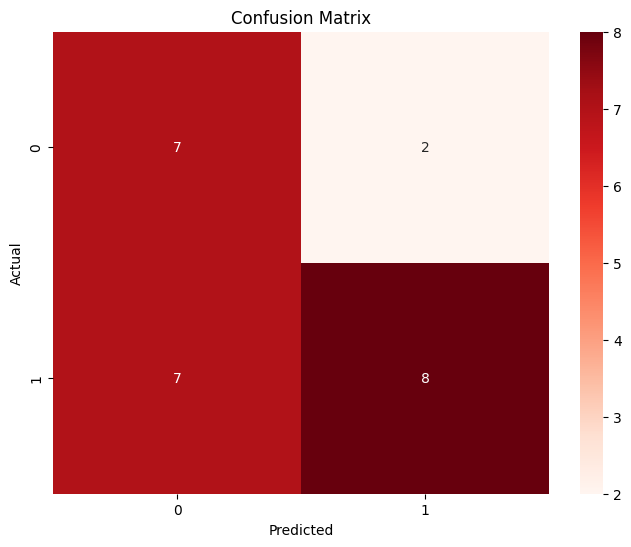

In [41]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the decision tree model shows that there are:
* 8 true positives, meaning that the model correctly classified 7 data points as floods.
* 2 false positives, meaning that the model incorrectly classified 2 data points as floods.
* 7 false negatives, meaning that the model incorrectly classified 8 data points as not floods.
* 7 true negatives, meaning that the model correctly classified 7 data points as not floods.

## Random forest Classification

In [42]:
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_model = rmf.fit(X_train,y_train)
rmf_model

RandomForestClassifier(max_depth=3, random_state=0)

In [43]:
rmf_acc = cross_val_score(rmf_model,X_test,y_test,cv=3,scoring="accuracy",n_jobs=-1)

In [44]:
rmf_acc

array([0.5  , 0.75 , 0.625])

In [45]:
y_predict = rmf_model.predict(X_test)


Accuracy Score: 83.33%
Recall Score: 73.33%
ROC AUC Score: 86.67%


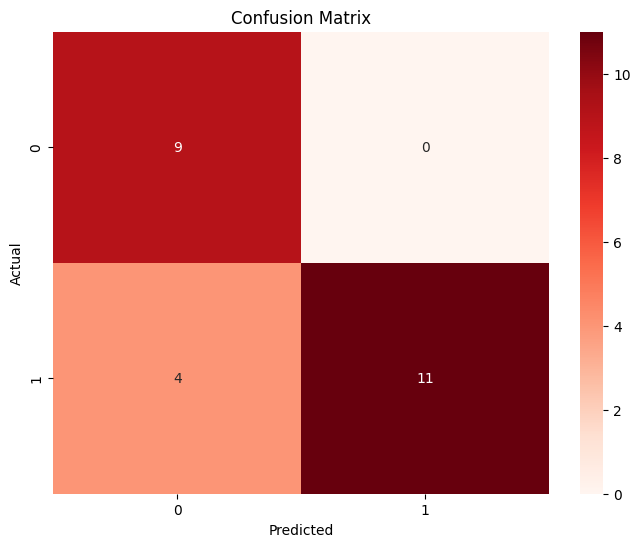

In [46]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix for the random forest model shows that there are:
* 11 true positives, meaning that the model correctly classified 11 data points as floods.
* 0 false positives, meaning that the model incorrectly classified 2 data points as floods.
* 4 false negatives, meaning that the model incorrectly classified 2 data points as not floods.
* 9 true negatives, meaning that the model correctly classified 9 data points as not floods.

## Naive Bayes

In [47]:
nb = BernoulliNB(force_alpha=True)
nb_model = nb.fit(X_train,y_train)

nb_accuracy = cross_val_score(nb_model,X_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [48]:
nb_accuracy

array([0.625, 0.625, 0.625])

In [49]:
y_predict=nb_model.predict(X_test)

print("Actual Flood Values:")
print(y_test.values)

print("Predicted Flood Values:")
print(y_predict)

Actual Flood Values:
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1]
Predicted Flood Values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



Accuracy Score: 37.50%
Recall Score: 0.00%
ROC AUC Score: 50.00%


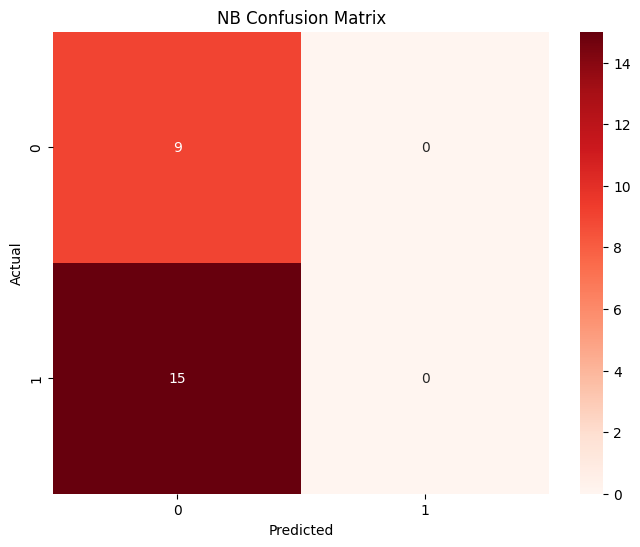

In [50]:
print('\nAccuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_predict) * 100))
print('Recall Score: {:.2f}%'.format(recall_score(y_test, y_predict) * 100))
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, y_predict) * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NB Confusion Matrix')
plt.show()

## Ensemble Learning

In [51]:
#create a dictionary of our models
estimators=[('knn', knn_model), ('lr', lr_model), ('svc', svc_model), ('rf', rmf_model)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

Performing ensemble learning for models with accuracies above 75% excludes BernoulliNB and Decisiton tree from the ensemble to achieve optimal results.

In [52]:
#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

# **Comparing all the prediction models**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
# Initialize models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('EL', VotingClassifier(estimators, voting='hard')))

namaModel = []
hasilModel = []

# Standardize the data
X_train_mini = minmax.fit_transform(X_train)
X_test_mini = minmax.transform(X_test)

# Train and test the models
for name, model in models:
    if name in ['LR']:  # LR models use standardized data
        model.fit(X_train_mini, y_train)
        y_predict = model.predict(X_test_mini)
    else:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
    hasilModel.append(accuracy_score(y_test, y_predict))
    namaModel.append(name)

tr_split = pd.DataFrame({'Name': namaModel, 'Score': hasilModel})
print(tr_split)


  Name     Score
0  KNN  0.916667
1   LR  0.875000
2  SVC  0.833333
3   DT  0.708333
4   RF  0.875000
5   NB  0.375000
6   EL  0.916667


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


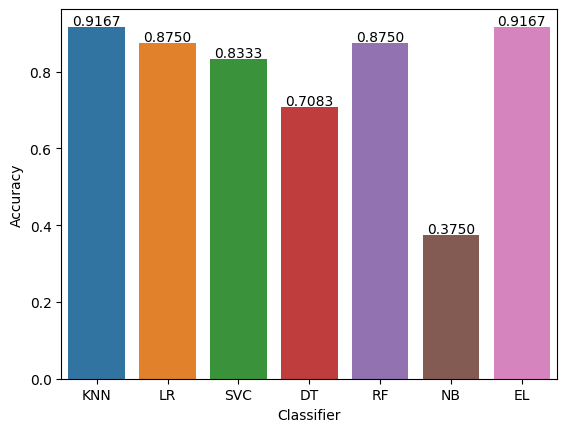

In [55]:
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The overall results of the five models in predicting floods show that **K-Nearest Neighbor (KNN) and Ensemble Learning has the highest accuracy score**, which is 0.9167. This means that the KNN model can predict with an accuracy of around 91.67%. Then for **the other models that are not inferior, namely the Random Forest (RF), Logistic Regression (LR) and Support Vector Classifier (SVC)** models, which is a good value in predicting floods. However, for the **Bernoulli Naive Bayes and Decision Tree (DT) models, they have lower accuracy scores**. So, the KNN model is the best model to predict floods based on the available data.